In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.DataFrame({'height' : [5,5.11,5.6,5.9,4.8,5.8,5.3,5.8,5.5,5.6],
        'age' : [45,26,30,34,40,36,19,28,23,32],
        'weight' : [77,47,55,59,72,60,40,60,45,58]
       })

print(data)
print(type(data))

   height  age  weight
0    5.00   45      77
1    5.11   26      47
2    5.60   30      55
3    5.90   34      59
4    4.80   40      72
5    5.80   36      60
6    5.30   19      40
7    5.80   28      60
8    5.50   23      45
9    5.60   32      58
<class 'pandas.core.frame.DataFrame'>


In [5]:
data

,height,age,weight
0,5.00,45,77
1,5.11,26,47
2,5.60,30,55
3,5.90,34,59
4,4.80,40,72
5,5.80,36,60
6,5.30,19,40
7,5.80,28,60
8,5.50,23,45
9,5.60,32,58


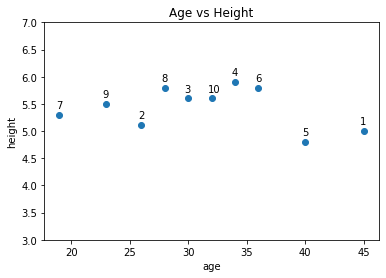

In [17]:
labels = data.index + 1
plt.figure(figsize=(6,4))
plt.scatter(data['age'], data['height'])
plt.title('Age vs Height')
plt.xlabel('age')
plt.ylabel('height')
plt.ylim(3,7)
for i,x,y in zip(labels, data['age'],data['height']):
  plt.annotate(s=i,xy=(x-0.3,y+0.12))
plt.show()

age = 38<br>
height = 5.5<br>
k = 3

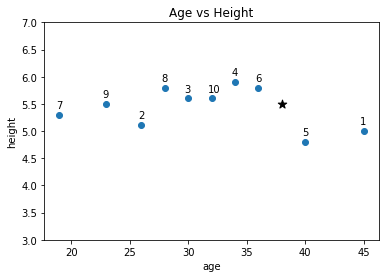

In [18]:
labels = data.index + 1
plt.figure(figsize=(6,4))
plt.scatter(data['age'], data['height'])
plt.scatter(38, 5.5, color='black', marker='*',s=80)
plt.title('Age vs Height')
plt.xlabel('age')
plt.ylabel('height')
plt.ylim(3,7)
for i,x,y in zip(labels, data['age'],data['height']):
  plt.annotate(s=i,xy=(x-0.3,y+0.12))
plt.show()

Euclidean Distance

In [33]:
# getting all distance of target point with all points using euclidean distance
data['eu_dist'] = np.sqrt((data['age'] - 38)**2 + (data['height'] - 5.5)**2)

In [34]:
data

,height,age,weight,eu_dist
0,5.00,45,77,7.017834
1,5.11,26,47,12.006336
2,5.60,30,55,8.000625
3,5.90,34,59,4.019950
4,4.80,40,72,2.118962
5,5.80,36,60,2.022375
6,5.30,19,40,19.001053
7,5.80,28,60,10.004499
8,5.50,23,45,15.000000
9,5.60,32,58,6.000833


In [35]:
data.sort_values(by = 'eu_dist')

,height,age,weight,eu_dist
5,5.80,36,60,2.022375
4,4.80,40,72,2.118962
3,5.90,34,59,4.019950
9,5.60,32,58,6.000833
0,5.00,45,77,7.017834
2,5.60,30,55,8.000625
7,5.80,28,60,10.004499
1,5.11,26,47,12.006336
8,5.50,23,45,15.000000
6,5.30,19,40,19.001053


In [37]:
# we going to select top 3 values frm sorted dataframe because we have choosen the value of k is 3

# we can conclude that index 5,4 and 3 is nearest neighbors of target value

#so we are going to take the weight of this 3 neighbors and calculate the aveage of 3 weights and thats our predicted value for unseen data.

data.loc[[3,4,5], 'weight']

3    59
4    72
5    60
Name: weight, dtype: int64

In [41]:
predicted_value = (data.loc[[3,4,5], 'weight']).mean()
predicted_value

63.666666666666664

In [48]:
print('Predicted weight for age = 38 and height = 5.5 is {} using euclidean distance'.format(round(predicted_value, 2)))

Predicted weight for age = 38 and height = 5.5 is 63.67 using euclidean distance


Manhattan Distance

In [53]:
data['mh_dist'] = abs((data['age'] - 38) + (data['height'] - 5.5))

In [54]:
data

,height,age,weight,eu_dist,mh_dist
0,5.00,45,77,7.017834,6.50
1,5.11,26,47,12.006336,12.39
2,5.60,30,55,8.000625,7.90
3,5.90,34,59,4.019950,3.60
4,4.80,40,72,2.118962,1.30
5,5.80,36,60,2.022375,1.70
6,5.30,19,40,19.001053,19.20
7,5.80,28,60,10.004499,9.70
8,5.50,23,45,15.000000,15.00
9,5.60,32,58,6.000833,5.90


In [55]:
sum(data['mh_dist'])

83.19000000000001

In [59]:
data.sort_values(by = 'mh_dist')

,height,age,weight,eu_dist,mh_dist
4,4.80,40,72,2.118962,1.30
5,5.80,36,60,2.022375,1.70
3,5.90,34,59,4.019950,3.60
9,5.60,32,58,6.000833,5.90
0,5.00,45,77,7.017834,6.50
2,5.60,30,55,8.000625,7.90
7,5.80,28,60,10.004499,9.70
1,5.11,26,47,12.006336,12.39
8,5.50,23,45,15.000000,15.00
6,5.30,19,40,19.001053,19.20


in manhattan distance also we getting 3,5,4 index as closet value ,therefore it also gives 63.97 as predicted value.